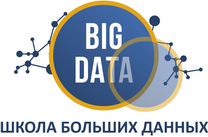

### Датасет продаж

In [4]:
import pandas as pd

In [19]:
# считываем данные из csv файла и выводим первые 5 строк
df = pd.read_csv('data/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [20]:
# удалим ненужный столбец старых индексов
df = df.drop(['Unnamed: 0'], axis=1)

In [21]:
# выводим последние 5 строк
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


**Описание признаков**

*TV*: сколько потрачено долларов на рекламу одного вида продукта по TV

*Radio*: сколько потрачено долларов на рекламу одного вида продукта по радио

*Newspaper*: сколько потрачено долларов на рекламу одного вида продукта через газеты


**Таргет**

*Sales*: количество продаж определенного товара в сети магазинах в тысячах



#### Подготовка данных

In [22]:
# Выделяем датасет с фичами
feature_cols = ['TV', 'Radio', 'Newspaper']
X = df[feature_cols]
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [23]:
# Выделяем таргет
y = df.Sales
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [24]:
# Отделяем данные для обучения и теста
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

### Используем interpret ML
https://interpret.ml/

In [2]:
!pip3 install interpret

  Using cached gevent-22.10.2-cp39-cp39-macosx_10_9_x86_64.whl
     |████████████████████████████████| 200 kB 739 kB/s eta 0:00:01


  Attempting uninstall: greenlet
    Found existing installation: greenlet 1.1.3
    Uninstalling greenlet-1.1.3:
      Successfully uninstalled greenlet-1.1.3
You should consider upgrading via the '/Users/masterdelivery/Documents/ML-interpretation/ml-env/bin/python3 -m pip install --upgrade pip' command.


In [25]:
from interpret.glassbox import ExplainableBoostingRegressor

ebm = ExplainableBoostingRegressor()
ebm.fit(X_train, y_train)

# or substitute with LogisticRegression, DecisionTreeClassifier, RuleListClassifier, ...
# EBM supports pandas dataframes, numpy arrays, and handles "string" data natively.

ExplainableBoostingRegressor(feature_names=['TV', 'Radio', 'Newspaper',
                                            'TV x Radio', 'TV x Newspaper',
                                            'Radio x Newspaper'],
                             feature_types=['continuous', 'continuous',
                                            'continuous', 'interaction',
                                            'interaction', 'interaction'])

In [26]:
from interpret.provider import InlineProvider
from interpret import set_visualize_provider

set_visualize_provider(InlineProvider())

In [27]:
from interpret import show

ebm_global = ebm.explain_global()
show(ebm_global)

### Интерпретация конкретных предсказаний

Теория

https://christophm.github.io/interpretable-ml-book/lime.html

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor

from interpret.blackbox import LimeTabular

# X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

lime = LimeTabular(predict_fn=gbr.predict, data=X_train)
lime_local = lime.explain_local(X_test[:5], y_test[:5])

show(lime_local)

In [29]:
# Другой датасет
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 68 to 102
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              455 non-null    float64
 1   mean texture             455 non-null    float64
 2   mean perimeter           455 non-null    float64
 3   mean area                455 non-null    float64
 4   mean smoothness          455 non-null    float64
 5   mean compactness         455 non-null    float64
 6   mean concavity           455 non-null    float64
 7   mean concave points      455 non-null    float64
 8   mean symmetry            455 non-null    float64
 9   mean fractal dimension   455 non-null    float64
 10  radius error             455 non-null    float64
 11  texture error            455 non-null    float64
 12  perimeter error          455 non-null    float64
 13  area error               455 non-null    float64
 14  smoothness error         

In [32]:
gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

lime = LimeTabular(predict_fn=gbr.predict, data=X_train)
lime_local = lime.explain_local(X_test[:5], y_test[:5])

show(lime_local)